In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv("/content/drive/MyDrive/Python Project/raw_data.csv")
pf=pd.read_csv("/content/drive/MyDrive/Python Project/transformed_data.csv")



# join to table.

In [4]:
df=df.reset_index()
pf=pf.reset_index()


In [5]:

df.head()


,index,iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,0,AFG,Afghanistan,2019-12-31,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
1,1,AFG,Afghanistan,2020-01-01,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
2,2,AFG,Afghanistan,2020-01-02,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
3,3,AFG,Afghanistan,2020-01-03,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
4,4,AFG,Afghanistan,2020-01-04,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494


In [6]:
pf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50418 entries, 0 to 50417
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    50418 non-null  int64  
 1   CODE     50418 non-null  object 
 2   COUNTRY  50418 non-null  object 
 3   DATE     50418 non-null  object 
 4   HDI      44216 non-null  float64
 5   TC       50418 non-null  float64
 6   TD       50418 non-null  float64
 7   STI      50418 non-null  float64
 8   POP      50418 non-null  float64
 9   GDPCAP   50418 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.8+ MB


In [7]:
md=df.merge(pf,how='left',on='index')

# Data Cleaning

In [8]:
md.nunique()

index                      50418
iso_code                     210
location                     210
date                         294
total_cases                19172
total_deaths                6374
stringency_index             170
population                   210
gdp_per_capita               184
human_development_index      157
Unnamed: 9                 19172
Unnamed: 10                 6374
Unnamed: 11                  170
Unnamed: 12                  210
Unnamed: 13                  185
CODE                         210
COUNTRY                      210
DATE                         294
HDI                          157
TC                         19171
TD                          6373
STI                          170
POP                          210
GDPCAP                       185
dtype: int64

## remove Duplicate Column from Data frame.

In [9]:
md1=md.drop(md.columns[10:22],axis=1)

In [10]:
md1.nunique()

index                      50418
iso_code                     210
location                     210
date                         294
total_cases                19172
total_deaths                6374
stringency_index             170
population                   210
gdp_per_capita               184
human_development_index      157
POP                          210
GDPCAP                       185
dtype: int64

In [11]:
md1.shape

(50418, 12)

## remove Null Value

In [12]:
md1.isnull().sum()


index                          0
iso_code                       0
location                       0
date                           0
total_cases                 3094
total_deaths               11190
stringency_index            7126
population                     0
gdp_per_capita              5712
human_development_index     6202
POP                            0
GDPCAP                         0
dtype: int64

In [13]:
md1['human_development_index'].mean()

0.7201385245160123

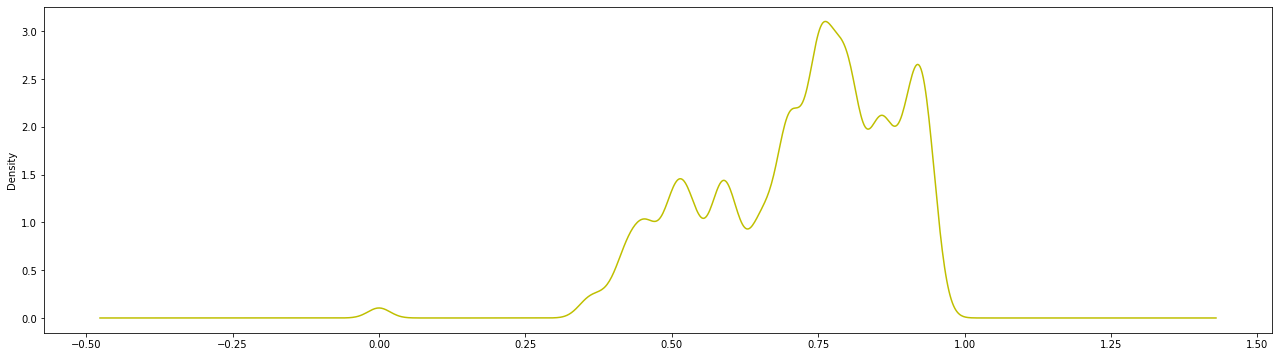

In [14]:
md1["human_development_index"].plot(kind = "kde",color = "y" ,figsize = (22,6))

In [15]:
md1['stringency_index'].mean()

56.16202208260186

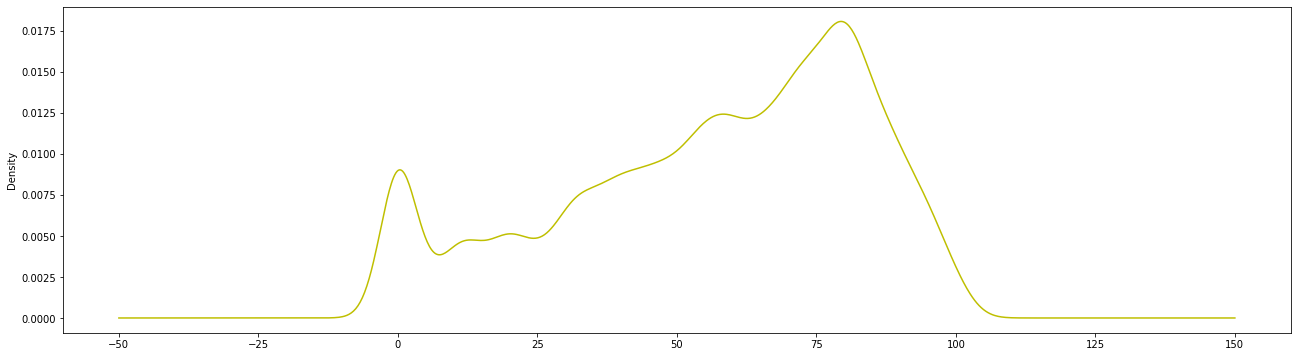

In [16]:
md1["stringency_index"].plot(kind = "kde",color = "y" ,figsize = (22,6))

In [17]:
md1['gdp_per_capita'].mean()

20818.706239788844

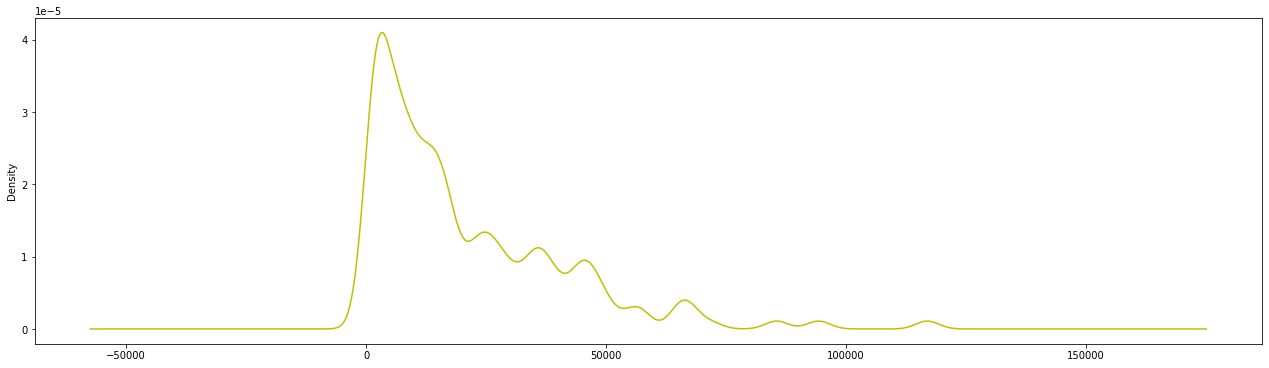

In [18]:
md1["gdp_per_capita"].plot(kind = "kde",color = "y" ,figsize = (22,6))

In [19]:

# Remove NUll Values

md1['total_deaths']=md1['total_deaths'].fillna(0)
md1['total_cases']=md1['total_cases'].fillna(0)
md1['stringency_index']=md1['stringency_index'].fillna(56.16202208260186)
md1['human_development_index']=md1['human_development_index'].fillna(0.7201385245160123)
md1['gdp_per_capita']=md1['gdp_per_capita'].fillna(20818.706239788844)

In [20]:
md1.isnull().sum()

index                      0
iso_code                   0
location                   0
date                       0
total_cases                0
total_deaths               0
stringency_index           0
population                 0
gdp_per_capita             0
human_development_index    0
POP                        0
GDPCAP                     0
dtype: int64

In [21]:
md1.head()

,index,iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index,POP,GDPCAP
0,0,AFG,Afghanistan,2019-12-31,0.0,0.0,0.0,38928341,1803.987,0.498,17.477233,7.497754
1,1,AFG,Afghanistan,2020-01-01,0.0,0.0,0.0,38928341,1803.987,0.498,17.477233,7.497754
2,2,AFG,Afghanistan,2020-01-02,0.0,0.0,0.0,38928341,1803.987,0.498,17.477233,7.497754
3,3,AFG,Afghanistan,2020-01-03,0.0,0.0,0.0,38928341,1803.987,0.498,17.477233,7.497754
4,4,AFG,Afghanistan,2020-01-04,0.0,0.0,0.0,38928341,1803.987,0.498,17.477233,7.497754


In [22]:
md1.dtypes

index                        int64
iso_code                    object
location                    object
date                        object
total_cases                float64
total_deaths               float64
stringency_index           float64
population                   int64
gdp_per_capita             float64
human_development_index    float64
POP                        float64
GDPCAP                     float64
dtype: object

In [23]:
# Change Data type of Date from Object to   Date
md1.date=md1.date.astype('datetime64')

In [24]:
md1.date.unique()

array(['2019-12-31T00:00:00.000000000', '2020-01-01T00:00:00.000000000',
       '2020-01-02T00:00:00.000000000', '2020-01-03T00:00:00.000000000',
       '2020-01-04T00:00:00.000000000', '2020-01-05T00:00:00.000000000',
       '2020-01-06T00:00:00.000000000', '2020-01-07T00:00:00.000000000',
       '2020-01-08T00:00:00.000000000', '2020-01-09T00:00:00.000000000',
       '2020-01-10T00:00:00.000000000', '2020-01-11T00:00:00.000000000',
       '2020-01-12T00:00:00.000000000', '2020-01-13T00:00:00.000000000',
       '2020-01-14T00:00:00.000000000', '2020-01-15T00:00:00.000000000',
       '2020-01-16T00:00:00.000000000', '2020-01-17T00:00:00.000000000',
       '2020-01-18T00:00:00.000000000', '2020-01-19T00:00:00.000000000',
       '2020-01-20T00:00:00.000000000', '2020-01-21T00:00:00.000000000',
       '2020-01-22T00:00:00.000000000', '2020-01-23T00:00:00.000000000',
       '2020-01-24T00:00:00.000000000', '2020-01-25T00:00:00.000000000',
       '2020-01-26T00:00:00.000000000', '2020-01-27

In [25]:
md2=md1.copy()

# Data Analysis

## Top 10 Countries with Highest Covid Cases

In [26]:
top_10_countries=md1.groupby(['location'])['total_cases'].sum().sort_values(ascending=[False]).head(10)

In [27]:
top_10_countries

location
United States     746014098.0
Brazil            425704517.0
India             407771615.0
Russia            132888951.0
Peru               74882695.0
Mexico             74347548.0
Spain              73717676.0
South Africa       63027659.0
Colombia           60543682.0
United Kingdom     59475032.0
Name: total_cases, dtype: float64

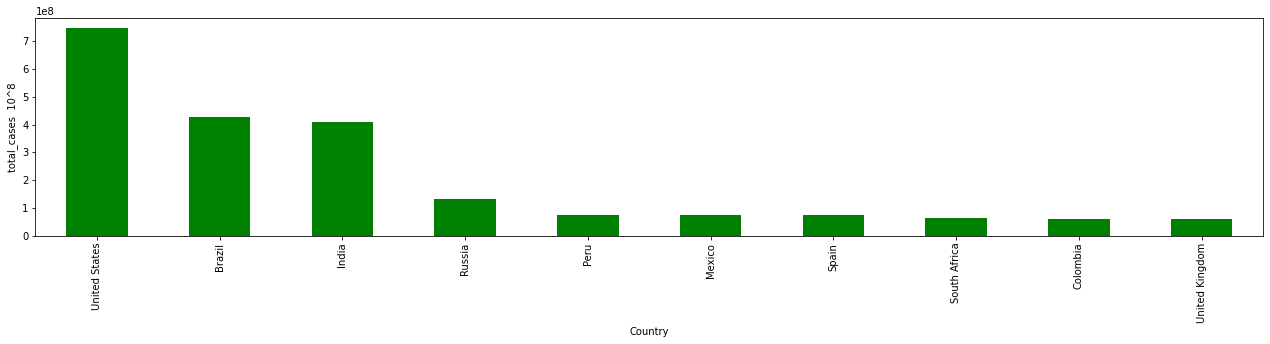

In [28]:
top_10_countries.plot(kind = "bar", figsize = (22,4), color = "g", xlabel = "Country", ylabel = 'total_cases  10^8')

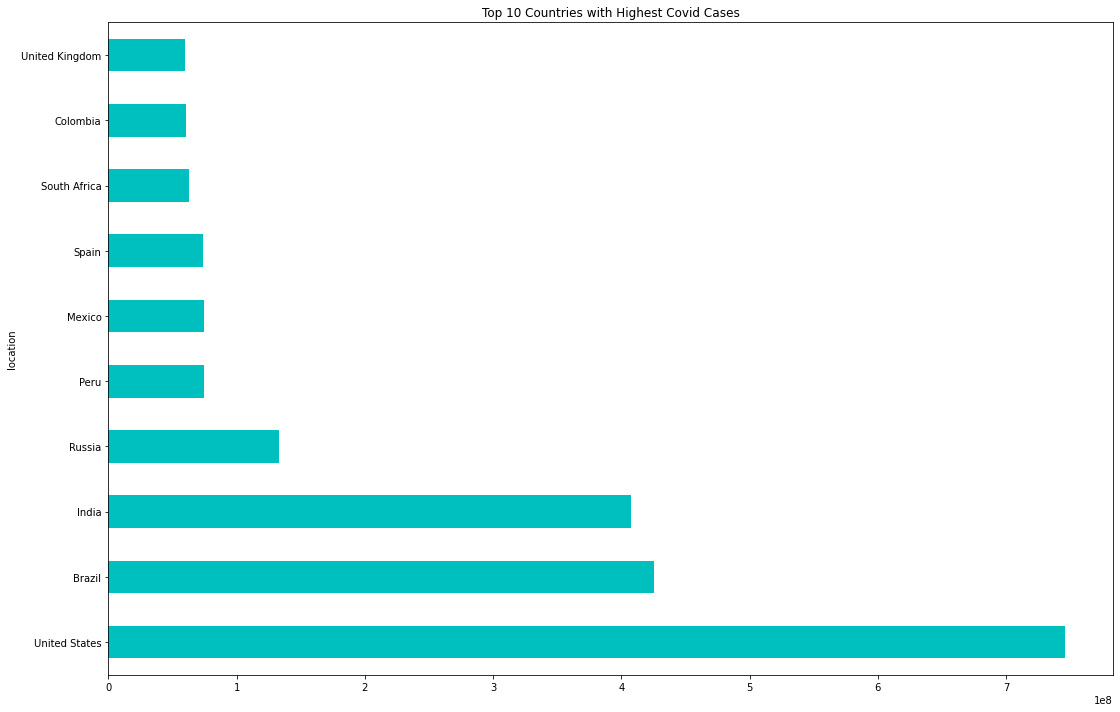

In [29]:
top_10_countries.plot(kind='barh',figsize=(18,12),color = "c",title='Top 10 Countries with Highest Covid Cases')

# Top 10 Countries with Lowest Covid Cases

In [30]:
Bottom_10_countries=md1.groupby(['location'])['total_cases'].sum().sort_values(ascending=[False]).tail(10)

In [31]:
Bottom_10_countries

location
Laos                     4039.0
Dominica                 3977.0
Saint Kitts and Nevis    3246.0
Greenland                2678.0
Falkland Islands         2467.0
Vatican                  2415.0
Montserrat               2383.0
Anguilla                  614.0
Solomon Islands            11.0
Hong Kong                   0.0
Name: total_cases, dtype: float64

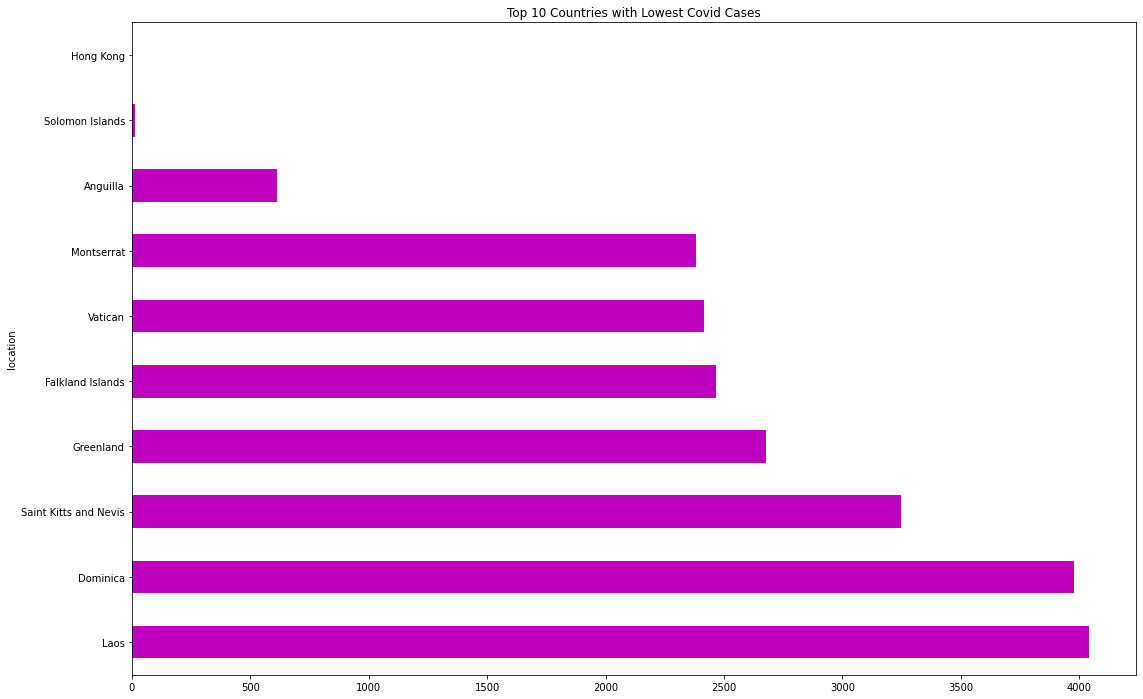

In [32]:
Bottom_10_countries.plot(kind='barh',figsize=(18,12),color = "m",title='Top 10 Countries with Lowest Covid Cases')

## Total number of deaths among the countries with the highestnumber of covid-19 cases

In [33]:
Total_Death=md1.groupby(['location'])['total_cases','total_deaths'].sum()
Total_Death

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,total_cases,total_deaths
location,,
Afghanistan,5126433.0,165875.0
Albania,1071951.0,31056.0
Algeria,4893999.0,206429.0
Andorra,223576.0,9850.0
Angola,304005.0,11820.0
...,...,...
Venezuela,4839834.0,40840.0
Vietnam,122618.0,2318.0
Yemen,228925.0,64304.0


In [34]:
Total_Death=Total_Death.sort_values(['total_cases','total_deaths'],ascending=[False,False]).head(10)
Total_Death

,total_cases,total_deaths
location,,
United States,746014098.0,26477574.0
Brazil,425704517.0,14340567.0
India,407771615.0,7247327.0
Russia,132888951.0,2131571.0
Peru,74882695.0,3020038.0
Mexico,74347548.0,7295850.0
Spain,73717676.0,5510624.0
South Africa,63027659.0,1357682.0
Colombia,60543682.0,1936134.0


In [35]:
Total_Death['Prcentage']=round(Total_Death['total_deaths']/Total_Death['total_cases']*100,2)

Total_Death


,total_cases,total_deaths,Prcentage
location,,,
United States,746014098.0,26477574.0,3.55
Brazil,425704517.0,14340567.0,3.37
India,407771615.0,7247327.0,1.78
Russia,132888951.0,2131571.0,1.60
Peru,74882695.0,3020038.0,4.03
Mexico,74347548.0,7295850.0,9.81
Spain,73717676.0,5510624.0,7.48
South Africa,63027659.0,1357682.0,2.15
Colombia,60543682.0,1936134.0,3.20


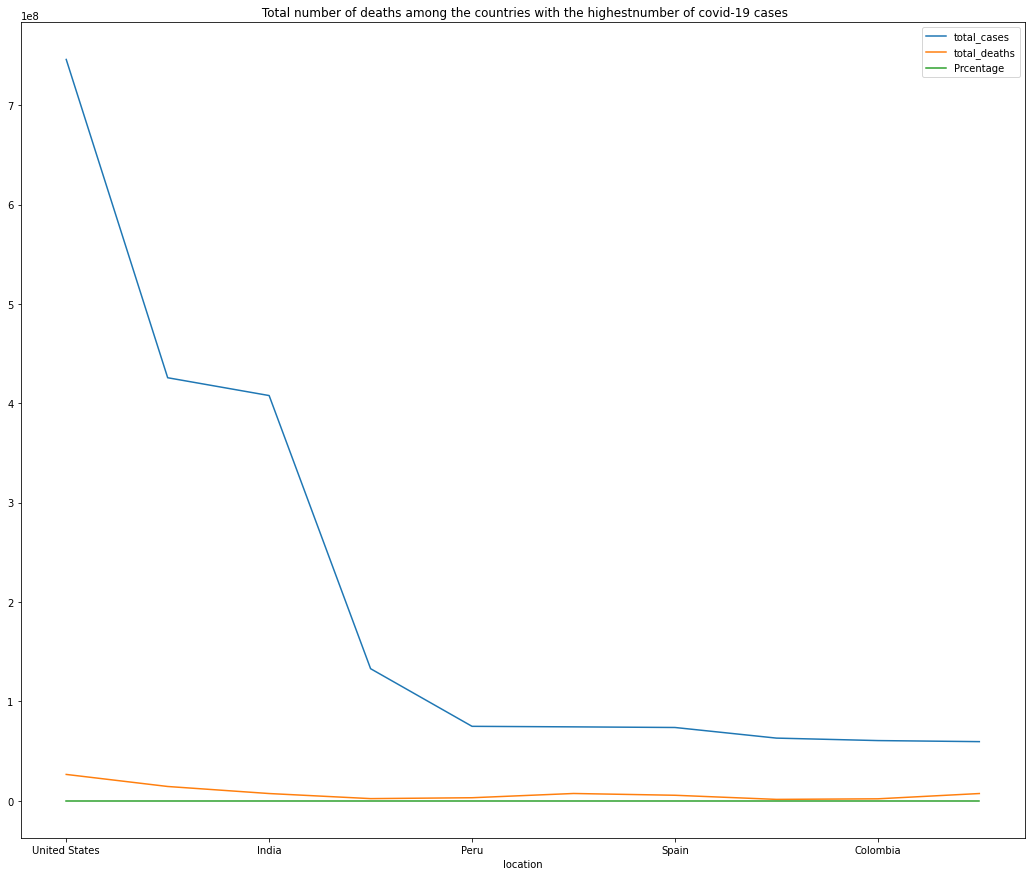

In [36]:
Total_Death.plot(kind='line',figsize=(18,15),title=' Total number of deaths among the countries with the highestnumber of covid-19 cases')

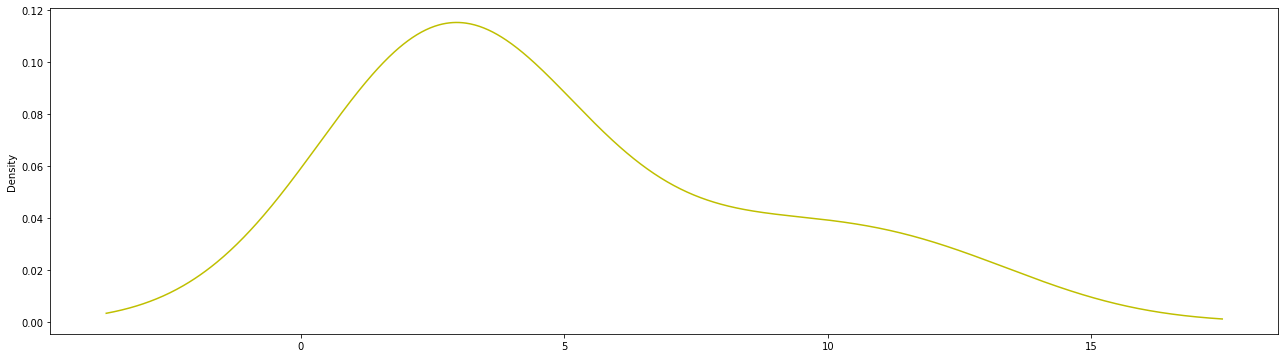

In [37]:
Total_Death["Prcentage"].plot(kind = "kde",color = "y" ,figsize = (22,6))

## Percentage of total deaths and total cases among all the countries with the highest number of covid-19 cases

### world _ case / country _ case

In [38]:
md1.total_cases.sum()

3133760956.0

In [39]:
md1.total_deaths.sum()

116851104.0

In [40]:
Total_Ratio=md1.groupby(['location'])['total_cases','total_deaths'].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [41]:
# Find Percentage for Case And Death
Total_Ratio['Case_Percentage']=round(Total_Ratio['total_cases']/md1.total_cases.sum()*100,2)

In [42]:
# Find Percentage for Case And Death
Total_Ratio['Death_Percentage']=round(Total_Ratio['total_deaths']/md1.total_deaths.sum()*100,2)

In [43]:
# find top 10 
Total_Ratio=Total_Ratio.sort_values(['Case_Percentage','Death_Percentage'],ascending=[False,False]).head(10)

In [44]:
# remove Total_Case and total_deaths column
Total_Ratio=Total_Ratio.drop(['total_cases','total_deaths'],axis=1)

In [45]:
Total_Ratio

,Case_Percentage,Death_Percentage
location,,
United States,23.81,22.66
Brazil,13.58,12.27
India,13.01,6.20
Russia,4.24,1.82
Peru,2.39,2.58
Mexico,2.37,6.24
Spain,2.35,4.72
South Africa,2.01,1.16
Colombia,1.93,1.66


In [46]:
# plt.bar(Total_Ratio['location'], Total_Ratio['Case_Percentage'],data='Total_Ratio',color = "orange")
# plt.rcParams['figure.figsize'] = [18,15]
# plt.title('top_10_countries corona Cases in Percentage')

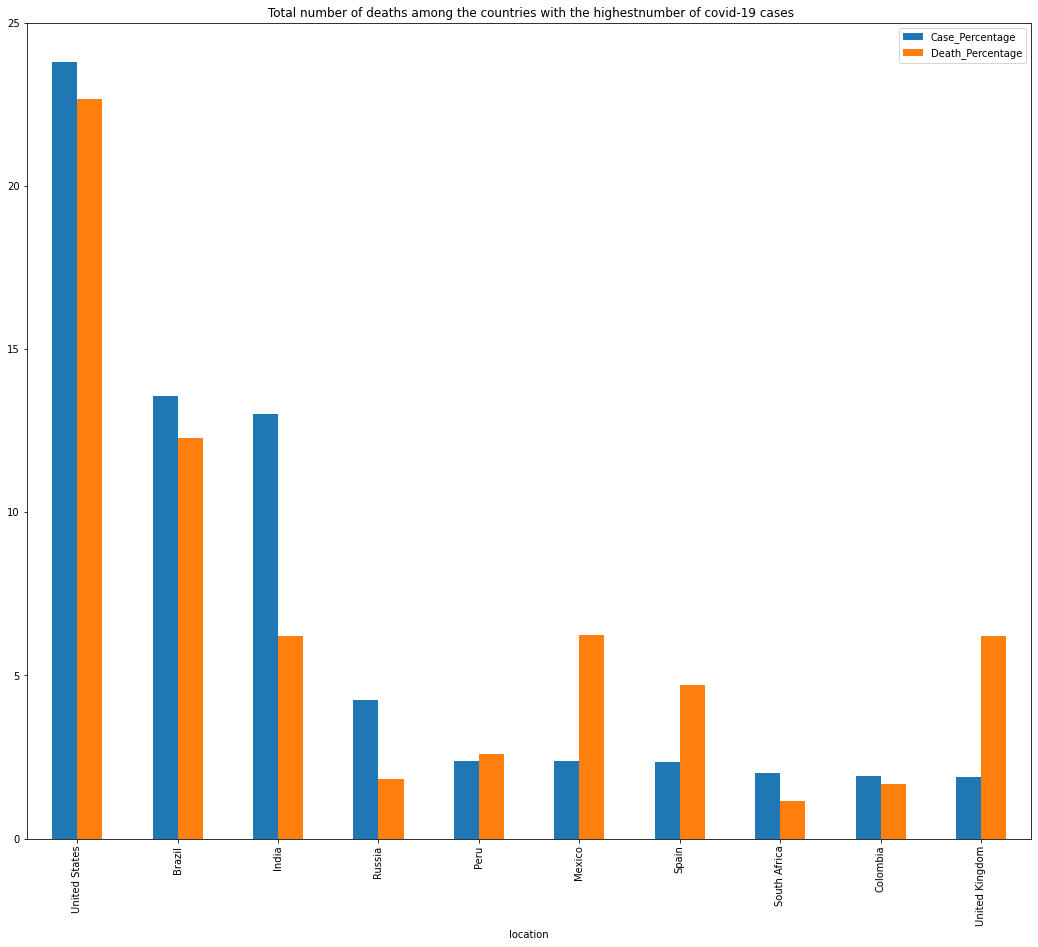

In [47]:
Total_Ratio.plot(kind='bar',figsize=(18,15),title=' Total number of deaths among the countries with the highestnumber of covid-19 cases')

## calculate the death rate of Covid-19 cases


### country death / country Case

In [48]:
Total_Death_rate=md1.groupby(['location'])['total_cases','total_deaths'].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [49]:
Total_Death_rate['Country_Death_rate']=round(Total_Death_rate['total_deaths']/Total_Death_rate['total_cases']*100,2)

In [50]:
Total_Death_rate=Total_Death_rate.sort_values(['Country_Death_rate'],ascending=[False]).reset_index().head(10)

In [51]:
Total_Death_rate=Total_Death_rate.drop(['total_cases','total_deaths'],axis=1)


In [52]:
Total_Death_rate

,location,Country_Death_rate
0,Yemen,28.09
1,Italy,13.13
2,United Kingdom,12.19
3,Belgium,11.84
4,France,11.25
5,Mexico,9.81
6,Netherlands,8.77
7,Jersey,8.28
8,Chad,7.92
9,Sweden,7.90


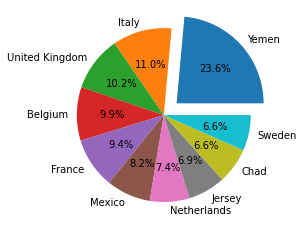

In [53]:
mylabels=Total_Death_rate['location']
myexplode = [0.2,0,0,0,0,0,0,0,0,0]

plt.pie(Total_Death_rate['Country_Death_rate'],labels=mylabels,explode=myexplode,autopct='%1.1f%%')
plt.show()

## Country Wise stringency index

In [54]:
Country_wise_sti=md1.groupby(['location'])['stringency_index'].mean().sort_values(ascending=[False]).head(10)

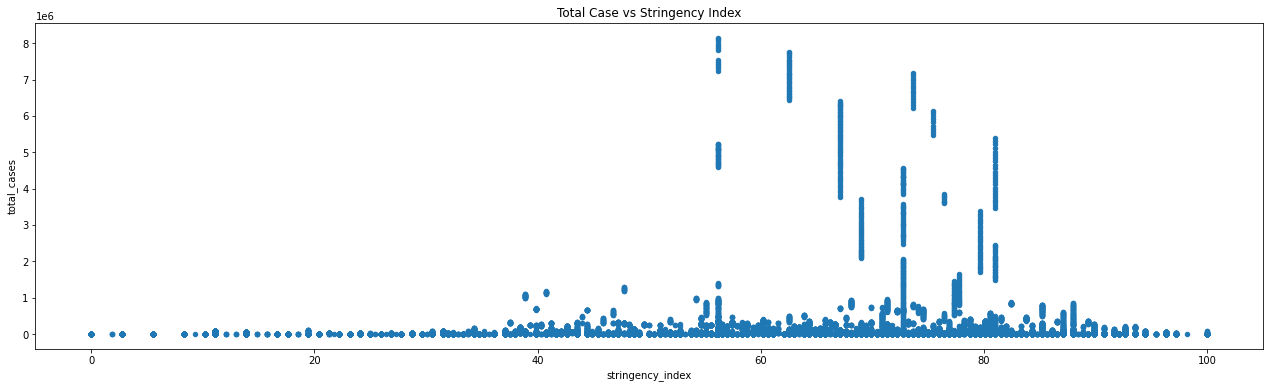

In [55]:
md1[['total_cases','stringency_index']].plot(y= 'total_cases', x ='stringency_index', kind= "scatter", figsize = (22,6), title = 'Total Case vs Stringency Index')

In [56]:
Country_wise_sti

location
Honduras       92.607910
Eritrea        91.230849
Bolivia        87.504532
Libya          85.909696
El Salvador    85.497544
Palestine      84.577552
Venezuela      83.083781
Peru           82.470085
Uganda         82.381085
Panama         81.822400
Name: stringency_index, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7a386f3e50>],
      dtype=object)

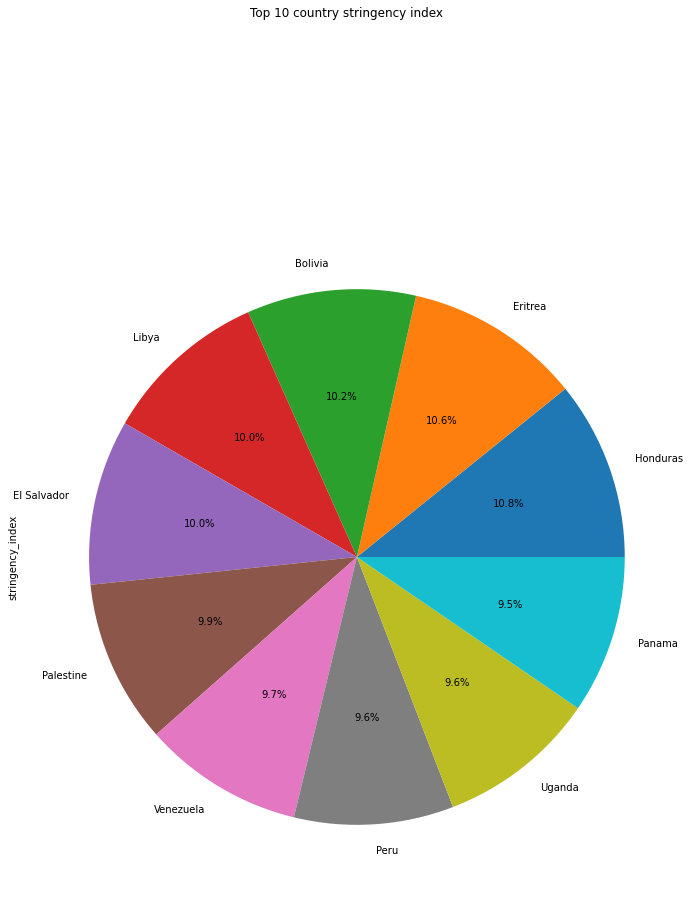

In [57]:
Country_wise_sti.plot(kind='pie',subplots='True',figsize=(12,16),title='Top 10 country stringency index',autopct='%1.1f%%')

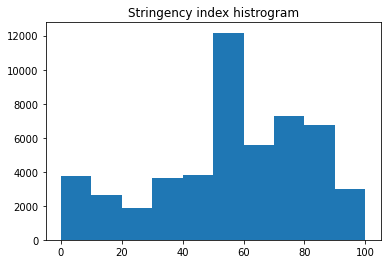

In [58]:
x=md1.stringency_index

plt.hist(x)
plt.rcParams['figure.figsize'] = [8,14]
plt.title('Stringency index histrogram')

plt.show() 

## Date Wise Corona Cases.

In [59]:
md1.head(5)

,index,iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index,POP,GDPCAP
0,0,AFG,Afghanistan,2019-12-31,0.0,0.0,0.0,38928341,1803.987,0.498,17.477233,7.497754
1,1,AFG,Afghanistan,2020-01-01,0.0,0.0,0.0,38928341,1803.987,0.498,17.477233,7.497754
2,2,AFG,Afghanistan,2020-01-02,0.0,0.0,0.0,38928341,1803.987,0.498,17.477233,7.497754
3,3,AFG,Afghanistan,2020-01-03,0.0,0.0,0.0,38928341,1803.987,0.498,17.477233,7.497754
4,4,AFG,Afghanistan,2020-01-04,0.0,0.0,0.0,38928341,1803.987,0.498,17.477233,7.497754


In [60]:

##  Get MOnth And Year from Dataframe

md1['month']=md1['date'].dt.strftime('%B')

md1['Year']=md1['date'].dt.strftime('%Y')





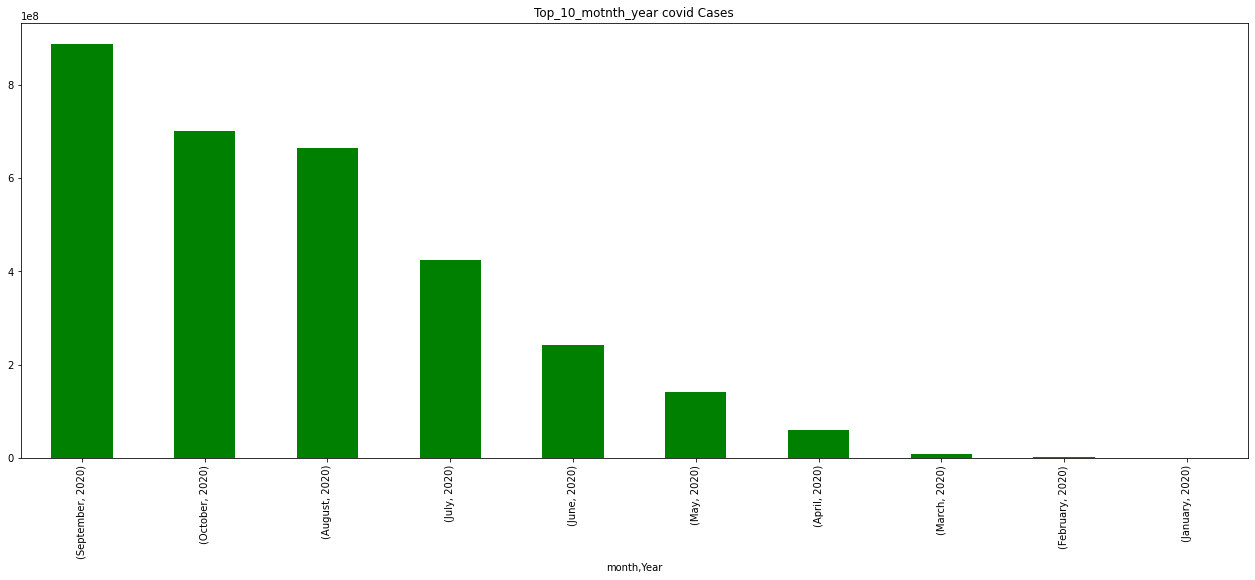

In [61]:


top_10_motnth_year=md1.groupby(['month','Year'])['total_cases'].sum().sort_values(ascending=[False]).head(10)

top_10_motnth_year.plot(kind='bar',figsize=(22,8),color = "g",title='Top_10_motnth_year covid Cases')


In [62]:
top_10_motnth_year

month      Year
September  2020    888284228.0
October    2020    701486309.0
August     2020    665177183.0
July       2020    425205604.0
June       2020    241865375.0
May        2020    141060938.0
April      2020     60557941.0
March      2020      8463009.0
February   2020      1621911.0
January    2020        38431.0
Name: total_cases, dtype: float64

## Monthly Death Vs Corona Cases.

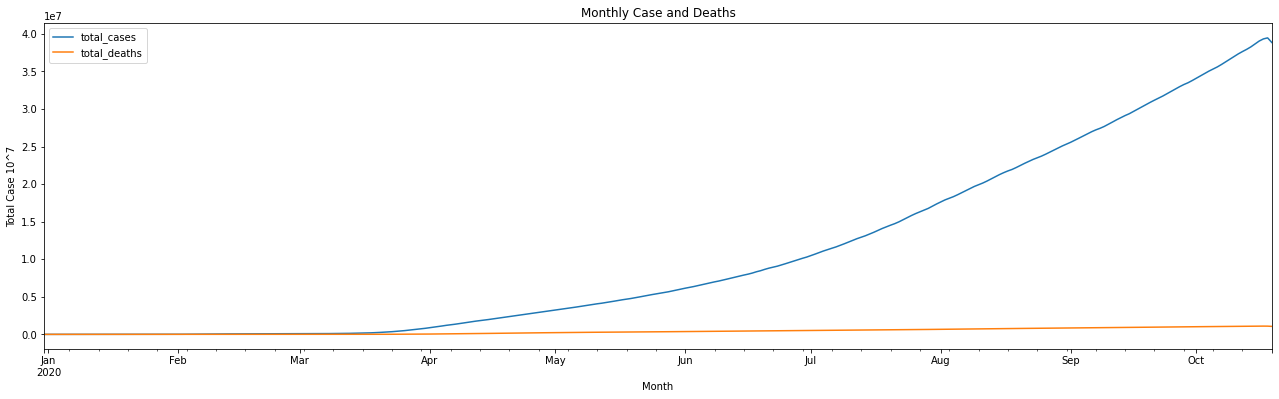

In [63]:
md1.groupby('date').agg({"total_cases" : sum , "total_deaths" : sum }).plot(kind= "line", figsize = (22,6), xlabel = "Month", ylabel = "Total Case 10^7", title = "Monthly Case and Deaths")

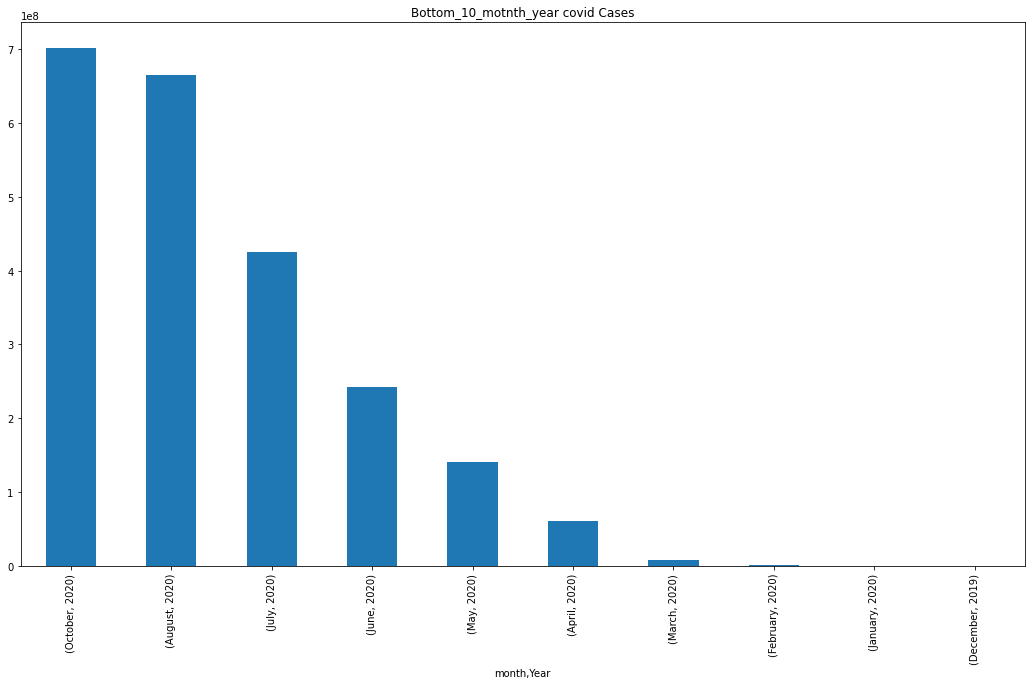

In [64]:
Bottom_10_motnth_year=md1.groupby(['month','Year'])['total_cases'].sum().sort_values(ascending=[False]).tail(10)

Bottom_10_motnth_year.plot(kind='bar',figsize=(18,10),title='Bottom_10_motnth_year covid Cases')

In [65]:
Bottom_10_motnth_year

month     Year
October   2020    701486309.0
August    2020    665177183.0
July      2020    425205604.0
June      2020    241865375.0
May       2020    141060938.0
April     2020     60557941.0
March     2020      8463009.0
February  2020      1621911.0
January   2020        38431.0
December  2019           27.0
Name: total_cases, dtype: float64

## Country Wise First Case.

In [66]:
md1.head()

,index,iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index,POP,GDPCAP,month,Year
0,0,AFG,Afghanistan,2019-12-31,0.0,0.0,0.0,38928341,1803.987,0.498,17.477233,7.497754,December,2019
1,1,AFG,Afghanistan,2020-01-01,0.0,0.0,0.0,38928341,1803.987,0.498,17.477233,7.497754,January,2020
2,2,AFG,Afghanistan,2020-01-02,0.0,0.0,0.0,38928341,1803.987,0.498,17.477233,7.497754,January,2020
3,3,AFG,Afghanistan,2020-01-03,0.0,0.0,0.0,38928341,1803.987,0.498,17.477233,7.497754,January,2020
4,4,AFG,Afghanistan,2020-01-04,0.0,0.0,0.0,38928341,1803.987,0.498,17.477233,7.497754,January,2020


In [67]:
md1.groupby(['location'])['date'].min()

location
Afghanistan   2019-12-31
Albania       2020-03-09
Algeria       2019-12-31
Andorra       2020-03-03
Angola        2020-03-22
                 ...    
Venezuela     2020-03-15
Vietnam       2019-12-31
Yemen         2020-04-10
Zambia        2020-03-19
Zimbabwe      2020-03-21
Name: date, Length: 210, dtype: datetime64[ns]

##  World Wide Total Cases Vs Total Death




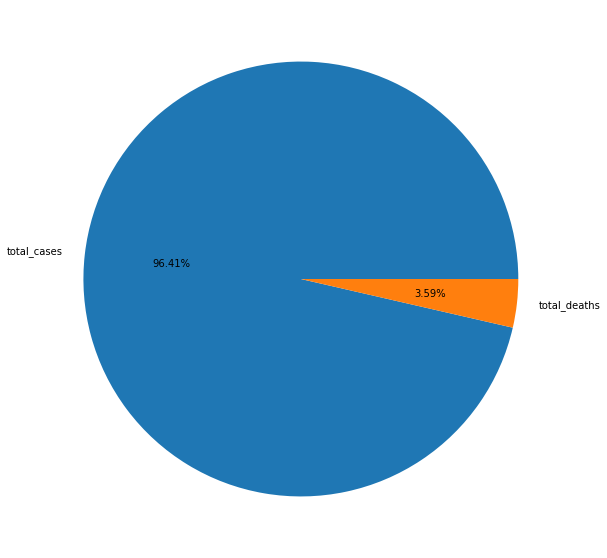

In [68]:
sum_case = sum(md1['total_cases'])
sum_death = sum(md1['total_deaths'])

fig,axs = plt.subplots(figsize = (10,10))
plt.subplot(1,1,1)
plt.pie([sum_case,sum_death], labels=['total_cases','total_deaths'],autopct='%1.2f%%')
plt.show()

# 3. analyze the impacts of covid-19 on the economy

## GDP per capita is the primary factor for analyzing the economic slowdowns caused due to the outbreak of covid-19.

## Correlation Between GDPCAP and human_development_index

In [69]:
md1.head()

,index,iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index,POP,GDPCAP,month,Year
0,0,AFG,Afghanistan,2019-12-31,0.0,0.0,0.0,38928341,1803.987,0.498,17.477233,7.497754,December,2019
1,1,AFG,Afghanistan,2020-01-01,0.0,0.0,0.0,38928341,1803.987,0.498,17.477233,7.497754,January,2020
2,2,AFG,Afghanistan,2020-01-02,0.0,0.0,0.0,38928341,1803.987,0.498,17.477233,7.497754,January,2020
3,3,AFG,Afghanistan,2020-01-03,0.0,0.0,0.0,38928341,1803.987,0.498,17.477233,7.497754,January,2020
4,4,AFG,Afghanistan,2020-01-04,0.0,0.0,0.0,38928341,1803.987,0.498,17.477233,7.497754,January,2020


In [70]:
cor=md1.loc[:,['population','gdp_per_capita','POP','GDPCAP']]

In [71]:
y=md1.groupby(['location'])['human_development_index','GDPCAP'].mean().reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


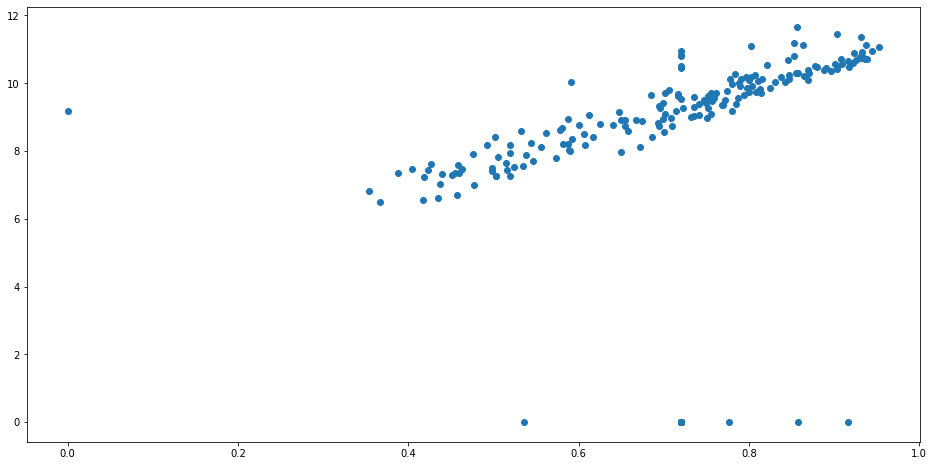

In [72]:
plt.rcParams['figure.figsize'] = [16,8]
plt.scatter(y['human_development_index'],y['GDPCAP'])



In [73]:
md1.location.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus',
       'Czech Republic', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Faeroe Islands', 'Falkland Isla

In [74]:
countries=md1.groupby(['iso_code'])['total_cases'].sum().reset_index()
countries


,iso_code,total_cases
0,ABW,215110.0
1,AFG,5126433.0
2,AGO,304005.0
3,AIA,614.0
4,ALB,1071951.0
...,...,...
205,VNM,122618.0
206,YEM,228925.0
207,ZAF,63027659.0
208,ZMB,1129913.0


In [75]:
countries.iso_code=countries.iso_code.str.lower()
countries

,iso_code,total_cases
0,abw,215110.0
1,afg,5126433.0
2,ago,304005.0
3,aia,614.0
4,alb,1071951.0
...,...,...
205,vnm,122618.0
206,yem,228925.0
207,zaf,63027659.0
208,zmb,1129913.0


In [76]:
countries.iso_code=countries.iso_code.str[:2]
countries

,iso_code,total_cases
0,ab,215110.0
1,af,5126433.0
2,ag,304005.0
3,ai,614.0
4,al,1071951.0
...,...,...
205,vn,122618.0
206,ye,228925.0
207,za,63027659.0
208,zm,1129913.0


In [77]:
countries.set_index(['iso_code']).to_dict()

{'total_cases': {'ab': 215110.0,
  'af': 5126433.0,
  'ag': 304005.0,
  'ai': 614.0,
  'al': 1071951.0,
  'an': 223576.0,
  'ar': 5474629.0,
  'at': 12619.0,
  'au': 4909197.0,
  'az': 4236782.0,
  'bd': 49745.0,
  'be': 5080.0,
  'bf': 231452.0,
  'bg': 1890380.0,
  'bh': 237908.0,
  'bi': 2200057.0,
  'bl': 106383.0,
  'bm': 28876.0,
  'bo': 11858838.0,
  'br': 30140.0,
  'bt': 22847.0,
  'bw': 205758.0,
  'ca': 20902374.0,
  'ch': 21632319.0,
  'ci': 2132883.0,
  'cm': 2476502.0,
  'co': 52437.0,
  'cp': 463888.0,
  'cr': 4631835.0,
  'cu': 19777.0,
  'cy': 236673.0,
  'cz': 5213980.0,
  'de': 42447678.0,
  'dj': 781771.0,
  'dm': 3977.0,
  'dn': 3030088.0,
  'do': 10649646.0,
  'dz': 4893999.0,
  'ec': 14408757.0,
  'eg': 12422845.0,
  'er': 40026.0,
  'es': 445402.0,
  'et': 4876417.0,
  'fi': 1458484.0,
  'fj': 4742.0,
  'fl': 2467.0,
  'fr': 56893.0,
  'ga': 1031803.0,
  'gb': 59475032.0,
  'ge': 431689.0,
  'gg': 49814.0,
  'gh': 4900649.0,
  'gi': 1195836.0,
  'gm': 229521.0,


In [78]:
countries

,iso_code,total_cases
0,ab,215110.0
1,af,5126433.0
2,ag,304005.0
3,ai,614.0
4,al,1071951.0
...,...,...
205,vn,122618.0
206,ye,228925.0
207,za,63027659.0
208,zm,1129913.0


In [79]:
pip install pygal_maps_world

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 270 kB 4.2 MB/s 
     |████████████████████████████████| 129 kB 48.5 MB/s 
  Created wheel for pygal-maps-world: filename=pygal_maps_world-1.0.2-py3-none-any.whl size=278561 sha256=7d278cabe92586fcdbeb06df1aee392abbc01f2382ff14ee57a71ff4342c5cf8
  Stored in directory: /root/.cache/pip/wheels/54/e6/11/5be0d3206bdc0ea8f0fcf1fe32661d7e614863c8b6a22655ae
Successfully built pygal-maps-world


In [80]:
pip install pygal

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [81]:
import pygal_maps_world.maps

wm = pygal_maps_world.maps.World()




In [82]:
# import pygal library
import pygal

# create a world map
# worldmap =  pygal.maps.World()
# worldmap =  pygal.maps.world.SupranationalWorld()
import pygal_maps_world.maps

wm = pygal_maps_world.maps.World()


# set the title of the map
wm.title = 'iso_code'

# adding the countries
wm.add('Covid Data',{'ab': 215110.0,
  'af': 5126433.0,
  'ag': 304005.0,
  'ai': 614.0,
  'al': 1071951.0,
  'an': 223576.0,
  'ar': 5474629.0,
  'at': 12619.0,
  'au': 4909197.0,
  'az': 4236782.0,
  'bd': 49745.0,
  'be': 5080.0,
  'bf': 231452.0,
  'bg': 1890380.0,
  'bh': 237908.0,
  'bi': 2200057.0,
  'bl': 106383.0,
  'bm': 28876.0,
  'bo': 11858838.0,
  'br': 30140.0,
  'bt': 22847.0,
  'bw': 205758.0,
  'ca': 20902374.0,
  'ch': 21632319.0,
  'ci': 2132883.0,
  'cm': 2476502.0,
  'co': 52437.0,
  'cp': 463888.0,
  'cr': 4631835.0,
  'cu': 19777.0,
  'cy': 236673.0,
  'cz': 5213980.0,
  'de': 42447678.0,
  'dj': 781771.0,
  'dm': 3977.0,
  'dn': 3030088.0,
  'do': 10649646.0,
  'dz': 4893999.0,
  'ec': 14408757.0,
  'eg': 12422845.0,
  'er': 40026.0,
  'es': 445402.0,
  'et': 4876417.0,
  'fi': 1458484.0,
  'fj': 4742.0,
  'fl': 2467.0,
  'fr': 56893.0,
  'ga': 1031803.0,
  'gb': 59475032.0,
  'ge': 431689.0,
  'gg': 49814.0,
  'gh': 4900649.0,
  'gi': 1195836.0,
  'gm': 229521.0,
  'gn': 557355.0,
  'gr': 2678.0,
  'gt': 7644426.0,
  'gu': 166917.0,
  'hk': 0.0,
  'hn': 6545499.0,
  'hr': 1314031.0,
  'ht': 1023155.0,
  'hu': 1708798.0,
  'id': 21570149.0,
  'im': 64935.0,
  'in': 407771615.0,
  'ir': 25280332.0,
  'is': 16202474.0,
  'it': 50752853.0,
  'ja': 370890.0,
  'je': 66777.0,
  'jo': 716514.0,
  'jp': 7659484.0,
  'ka': 13194863.0,
  'ke': 3277734.0,
  'kg': 4287847.0,
  'kh': 39539.0,
  'kn': 3246.0,
  'ko': 3333075.0,
  'kw': 10622205.0,
  'la': 4039.0,
  'lb': 1817274.0,
  'lc': 4450.0,
  'li': 19885.0,
  'lk': 446643.0,
  'ls': 107948.0,
  'lt': 488057.0,
  'lu': 1146724.0,
  'lv': 255964.0,
  'ma': 7839270.0,
  'mc': 21511.0,
  'md': 844040.0,
  'me': 74347548.0,
  'mk': 1724220.0,
  'ml': 251261.0,
  'mm': 644209.0,
  'mn': 7784.0,
  'mo': 510578.0,
  'mr': 799222.0,
  'ms': 2383.0,
  'mu': 69524.0,
  'mw': 536447.0,
  'my': 1774181.0,
  'na': 681299.0,
  'nc': 4495.0,
  'ne': 199978.0,
  'ng': 6107371.0,
  'ni': 524410.0,
  'nl': 13026629.0,
  'no': 1985889.0,
  'np': 5243653.0,
  'nz': 253203.0,
  'om': 10060093.0,
  'ow': 1345940.0,
  'pa': 10371724.0,
  'pe': 74882695.0,
  'ph': 22409936.0,
  'pn': 35966.0,
  'po': 9239657.0,
  'pr': 2265640.0,
  'ps': 3249458.0,
  'py': 95388.0,
  'qa': 16351440.0,
  'ro': 10672859.0,
  'ru': 132888951.0,
  'rw': 388775.0,
  'sa': 38585191.0,
  'sd': 1663545.0,
  'se': 1586747.0,
  'sg': 8191161.0,
  'sl': 2573206.0,
  'sm': 134994.0,
  'so': 491145.0,
  'sr': 3984174.0,
  'ss': 333500.0,
  'st': 121909.0,
  'su': 358632.0,
  'sv': 547075.0,
  'sw': 444238.0,
  'sx': 48026.0,
  'sy': 267902.0,
  'tc': 154173.0,
  'tg': 169903.0,
  'th': 655703.0,
  'tj': 1117391.0,
  'tl': 4697.0,
  'tt': 225550.0,
  'tu': 41431948.0,
  'tw': 97074.0,
  'tz': 91526.0,
  'ug': 448728.0,
  'uk': 15805665.0,
  'ur': 239884.0,
  'us': 746014098.0,
  'uz': 4421215.0,
  'va': 2415.0,
  'vc': 7824.0,
  've': 4839834.0,
  'vg': 4605.0,
  'vi': 98536.0,
  'vn': 122618.0,
  'ye': 228925.0,
  'za': 63027659.0,
  'zm': 1129913.0,
  'zw': 593699.0})

# save into the file
wm.render_to_file('Countries_wise Cases.svg')

print("Success")


Success


## Human Development Index

In [83]:
md1.head()

,index,iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index,POP,GDPCAP,month,Year
0,0,AFG,Afghanistan,2019-12-31,0.0,0.0,0.0,38928341,1803.987,0.498,17.477233,7.497754,December,2019
1,1,AFG,Afghanistan,2020-01-01,0.0,0.0,0.0,38928341,1803.987,0.498,17.477233,7.497754,January,2020
2,2,AFG,Afghanistan,2020-01-02,0.0,0.0,0.0,38928341,1803.987,0.498,17.477233,7.497754,January,2020
3,3,AFG,Afghanistan,2020-01-03,0.0,0.0,0.0,38928341,1803.987,0.498,17.477233,7.497754,January,2020
4,4,AFG,Afghanistan,2020-01-04,0.0,0.0,0.0,38928341,1803.987,0.498,17.477233,7.497754,January,2020


In [84]:
x=md1.groupby(['location'])['human_development_index'].mean().reset_index()
x

,location,human_development_index
0,Afghanistan,0.498
1,Albania,0.785
2,Algeria,0.754
3,Andorra,0.858
4,Angola,0.581
...,...,...
205,Venezuela,0.761
206,Vietnam,0.694
207,Yemen,0.452
208,Zambia,0.588


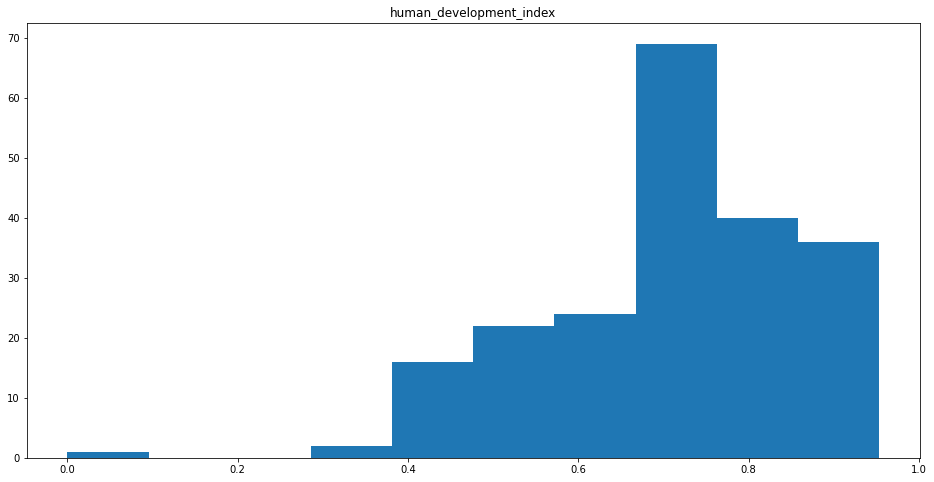

In [85]:
x=x['human_development_index']
plt.hist(x)
plt.rcParams['figure.figsize'] = [8,14]
plt.title('human_development_index')

plt.show() 

## GDP per capita during the rise in the cases of covid-19

In [86]:
md1.head()

,index,iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index,POP,GDPCAP,month,Year
0,0,AFG,Afghanistan,2019-12-31,0.0,0.0,0.0,38928341,1803.987,0.498,17.477233,7.497754,December,2019
1,1,AFG,Afghanistan,2020-01-01,0.0,0.0,0.0,38928341,1803.987,0.498,17.477233,7.497754,January,2020
2,2,AFG,Afghanistan,2020-01-02,0.0,0.0,0.0,38928341,1803.987,0.498,17.477233,7.497754,January,2020
3,3,AFG,Afghanistan,2020-01-03,0.0,0.0,0.0,38928341,1803.987,0.498,17.477233,7.497754,January,2020
4,4,AFG,Afghanistan,2020-01-04,0.0,0.0,0.0,38928341,1803.987,0.498,17.477233,7.497754,January,2020


In [87]:
md3=md1.copy()

In [88]:
md3.groupby(['date','location'])['GDPCAP'].mean()

date        location   
2019-12-31  Afghanistan     7.497754
            Algeria         9.540639
            Armenia         9.081095
            Australia      10.706581
            Austria        10.724075
                             ...    
2020-10-19  Venezuela       9.725856
            Vietnam         8.727759
            Yemen           7.299221
            Zambia          8.213179
            Zimbabwe        7.549491
Name: GDPCAP, Length: 50418, dtype: float64

In [89]:
md3.loc[:,['location','date','GDPCAP']]

,location,date,GDPCAP
0,Afghanistan,2019-12-31,7.497754
1,Afghanistan,2020-01-01,7.497754
2,Afghanistan,2020-01-02,7.497754
3,Afghanistan,2020-01-03,7.497754
4,Afghanistan,2020-01-04,7.497754
...,...,...,...
50413,Zimbabwe,2020-10-15,7.549491
50414,Zimbabwe,2020-10-16,7.549491
50415,Zimbabwe,2020-10-17,7.549491
50416,Zimbabwe,2020-10-18,7.549491
